Final portfolio value : 553,113.0 $
Annualized return : -22.3%
Annualized volatility : 72.3%
Sharpe Ratio : -0.1
Diversification : 100.0%
Maximum drawdown : 78.8%


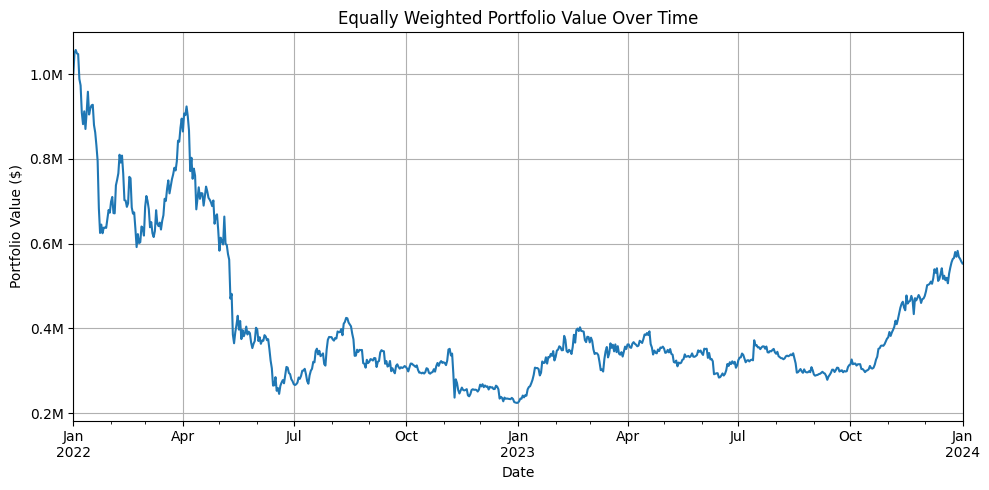

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


df = pd.read_csv("_data.csv")


df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df = df.loc['2022-01-01':'2024-01-01']

initial_portfolio_value = 1000000 

#Asset prices and returns
asset_prices = df
daily_returns = asset_prices.pct_change().dropna()

n_assets = daily_returns.shape[1]

#Equal weights
weights = np.ones(n_assets) / n_assets

#Amount allocated per asset
initial_prices = asset_prices.iloc[0]
position_values = weights * initial_portfolio_value
quantities = position_values / initial_prices

#Portfolio value over time
portfolio_value = asset_prices.dot(quantities)

#Portfolio daily returns
portfolio_daily_returns = portfolio_value.pct_change().dropna()
T = len(portfolio_daily_returns)




V0 = portfolio_value.iloc[0]
VT = portfolio_value.iloc[-1]
annualized_return = (365 / T) * ((VT - V0) / V0)


daily_std = np.std(portfolio_daily_returns, ddof=1)
annualized_volatility = np.sqrt(365) * daily_std


daily_mean_return = portfolio_daily_returns.mean()
risk_free_rate_annual = 0.05
sharpe_ratio = (365* daily_mean_return - risk_free_rate_annual) / annualized_volatility


H = np.sum(weights**2) / (np.sum(weights)**2)
diversification = (1 / n_assets) / H


rolling_max = portfolio_value.cummax()
drawdowns = 1 - portfolio_value / rolling_max
max_drawdown = drawdowns.max()


print(f"Final portfolio value : {VT:,.1f} $")
print(f"Annualized return : {annualized_return:.1%}")
print(f"Annualized volatility : {annualized_volatility:.1%}")
print(f"Sharpe Ratio : {sharpe_ratio:.1f}")
print(f"Diversification : {diversification:.1%}")
print(f"Maximum drawdown : {max_drawdown:.1%}")


plt.figure(figsize=(10, 5))
portfolio_value.plot(title="Equally Weighted Portfolio Value Over Time", figsize=(10, 5))
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.ticklabel_format(axis='y', style='plain', useMathText=True)  
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))
plt.grid()
plt.tight_layout()
plt.show()
